Importación de tablas

In [1]:
from sqlalchemy import create_engine
import pandas as pd

usuario = "root"
clave = ""
host = "127.0.0.1"
puerto = "3306"
nombre_bd = "practica"

engine = create_engine(f"mysql+pymysql://{usuario}:{clave}@{host}:{puerto}/{nombre_bd}")

empleados = pd.read_sql("SELECT * FROM em_empleados", engine)
proyectos = pd.read_sql("SELECT * FROM pr_proyectos", engine)
empleados_proyecto = pd.read_sql("SELECT * FROM pr_empleados_proyecto", engine)

Top 5 empleados más antiguos

In [2]:
empleados.sort_values("f_alta").head(5)

,id_empleado,tx_apellido1,tx_apellido2,cx_edocivil,tx_email,f_alta,f_baja,f_nacimiento,b_formacionu,tx_nif,tx_nombre,n_telefono1,n_telefono2
47,48,Benítez,Ruiz,S,santiago.benitez@example.com,2015-06-11,2020-04-12,1984-07-19,N,48234605Z,Santiago,683456816,628654348
27,28,Ortega,Vargas,C,mateo.ortega@example.com,2015-07-28,None,1984-04-04,N,28234585D,Mateo,683456796,628654328
7,8,Gil,Ruiz,C,alvaro.gil@example.com,2015-10-22,2023-05-05,1986-04-19,S,89012345H,Álvaro,682345685,628765425
37,38,Méndez,González,S,luis.mendez@example.com,2015-11-03,None,1983-10-13,S,38234595P,Luis,683456806,628654338
17,18,Castro,Gil,C,javier.castro@example.com,2015-12-02,None,1988-12-27,S,18234575T,Javier,681234574,629876550


Top 5 empleados más recientes

In [3]:
empleados.sort_values("f_alta", ascending=False).head(5)

,id_empleado,tx_apellido1,tx_apellido2,cx_edocivil,tx_email,f_alta,f_baja,f_nacimiento,b_formacionu,tx_nif,tx_nombre,n_telefono1,n_telefono2
50,51,Mokov,Ivanchov,S,amokov@fs.com,2025-01-17,None,2001-05-28,S,55408565H,Alejandro,648400557,654918060
46,47,Rey,Pérez,S,alicia.rey@example.com,2023-07-07,None,1992-04-08,S,47234604Y,Alicia,673456815,638654347
36,37,Peña,López,S,carmen.pena@example.com,2023-06-19,None,1991-07-26,S,37234594N,Carmen,673456805,638654337
28,29,Santos,Fernández,S,natalia.santos@example.com,2023-04-05,None,1993-03-11,S,29234586E,Natalia,693456797,618654329
18,19,Herrera,Marín,S,nuria.herrera@example.com,2023-03-15,None,1997-09-12,S,19234576U,Nuria,691234575,619876551


Distribución del número de años de los empleados en la empresa

<Axes: ylabel='Frequency'>

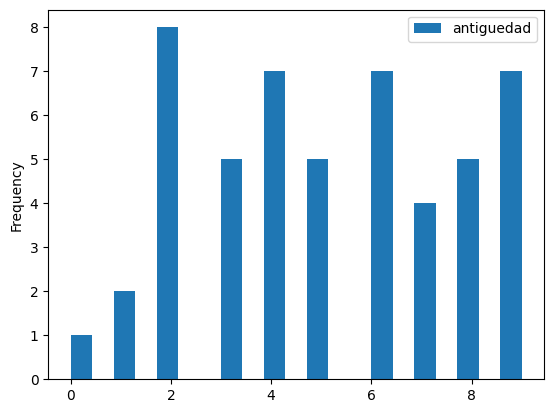

In [4]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
hoy = date.today()

antiguedades = []

for empleado in empleados.values:
    antiguedad = relativedelta(hoy, empleado[5]).years
    antiguedades.append(int(antiguedad))


antiguedades_df = pd.DataFrame(antiguedades, columns = ["antiguedad"])

antiguedades_df.plot(kind="hist", bins = 21)
    

Evolución de las altas por año

<Axes: title={'center': 'Evolución de altas por año'}, xlabel='Año', ylabel='Número de altas'>

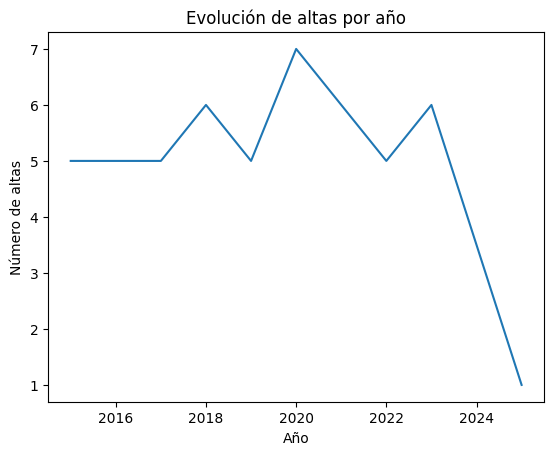

In [36]:

altas_years = pd.DatetimeIndex(empleados["f_alta"]).year.value_counts().sort_index()

altas_years.plot(title="Evolución de altas por año", xlabel = "Año", ylabel="Número de altas")


Evolución de bajas por años

<Axes: title={'center': 'Evolución de bajas por año'}, xlabel='Año', ylabel='Número de bajas'>

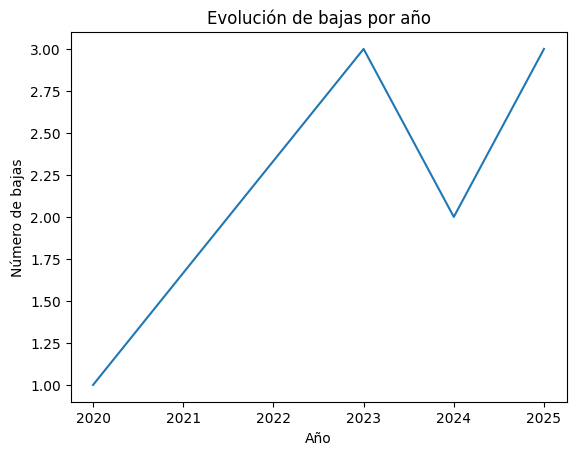

In [6]:
bajas_years = pd.DatetimeIndex(empleados["f_baja"]).year.value_counts().sort_index()

bajas_years.plot(title="Evolución de bajas por año", xlabel = "Año", ylabel="Número de bajas")


Años con mayor crecimiento/decrecimiento

In [44]:
top_1_altas = altas_years.sort_values(ascending=False).head(1)

year_most = top_1_altas.index[0] 
altas_most = top_1_altas.iloc[0] 

print(f"Año con mayor crecimiento: {year_most} con {altas_most} altas")

top_1_bajas = bajas_years.sort_values(ascending=False).head(1)

year_least = int(top_1_bajas.index[0]) 
altas_least = top_1_bajas.iloc[0] 

print(f"Año con mayor decrecimiento: {year_least} con {altas_least} bajas")


Año con mayor crecimiento: 2020 con 7 altas
Año con mayor decrecimiento: 2023 con 3 bajas


Distribución de empleados solteros y casados

<Axes: xlabel='cx_edocivil'>

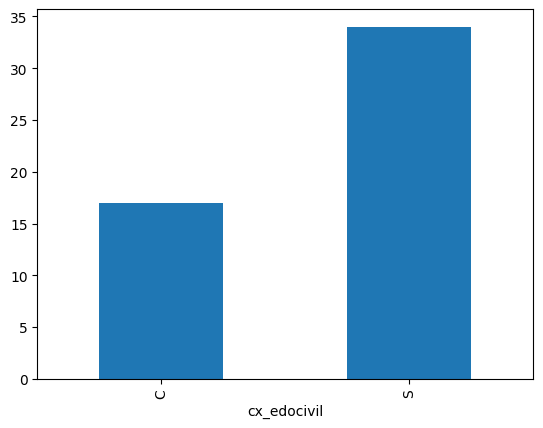

In [7]:
edos = empleados["cx_edocivil"].value_counts().sort_index()

edos.plot(kind="bar")

Distribución de edades de los empleados

<Axes: ylabel='Frequency'>

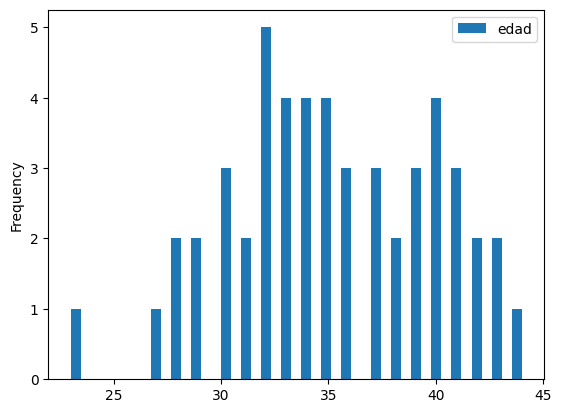

In [37]:
edades = []

for fNac in empleados["f_nacimiento"].values:
    edad = hoy - fNac
    edad_years = relativedelta(hoy, fNac).years
    edades.append(edad_years)
    

edades_df = pd.DataFrame(edades, columns = ["edad"])

edades_df.plot(kind="hist", bins = 45)

    

Edad media y desviación típica de los empleados

In [9]:
import statistics

edadMedia = edades_df.mean().values[0]
desvTipica = statistics.stdev(edades)

print(f"Edad media empleados: {edadMedia:.2f} años")
print(f"Desviación típica empleados: {desvTipica:.2f} años")


Edad media empleados: 35.16 años
Desviación típica empleados: 4.78 años


Proyectos

Número de proyectos activos, finalizados y total

In [10]:
countActive = 0
countFinished = 0
countTotal = len(proyectos.values)

for fFin in proyectos["f_fin"].values:
    if fFin:
        if fFin < hoy:
            countFinished += 1
        else:
            countActive += 1

print(f"Proyectos activos: {countActive}")
print(f"Proyectos finalizados: {countFinished}")
print(f"Proyectos totales: {countTotal}")

Proyectos activos: 12
Proyectos finalizados: 8
Proyectos totales: 20


Distribución de la duración de los proyectos (histograma)

<Axes: ylabel='Frequency'>

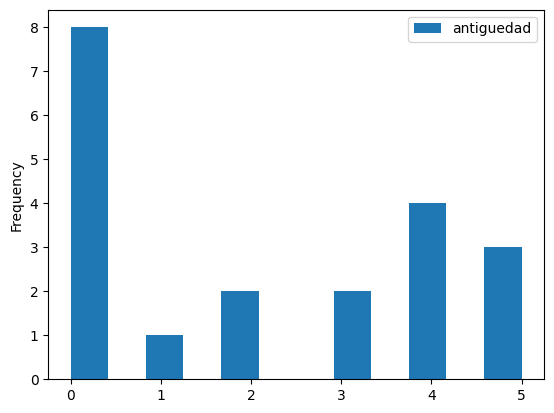

In [16]:
duraciones = []

for proyecto in proyectos[["f_inicio","f_fin"]].values:
    if proyecto[1]:
        duracion_years = relativedelta(proyecto[1], proyecto[0]).years
    else:
        duracion_years = relativedelta(hoy, proyecto[0]).years
    duraciones.append(int(duracion_years))



antiguedades_df = pd.DataFrame(duraciones, columns = ["antiguedad"])

antiguedades_df.plot(kind="hist", bins = 12)

Distribución de proyectos por lugar

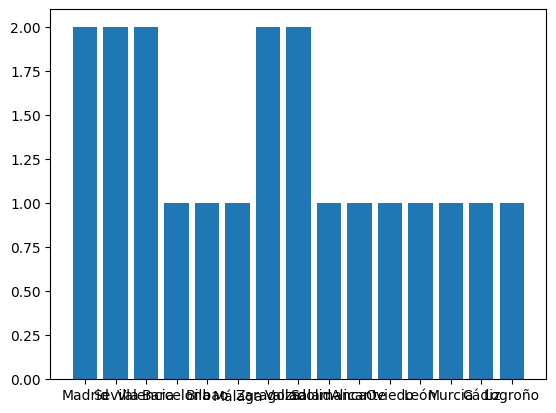

In [12]:
lugares = {}

for proyecto in proyectos["tx_lugar"].values:
    if proyecto not in lugares.keys():
        lugares[proyecto] = 1
    else:
        lugares[proyecto] += 1


x = np.array(list(lugares.keys()))
y = np.array(list((lugares.values())))

plt.bar(x,y)
plt.show()

Empleados a Proyectos

Distribución del número de proyectos a los que están asignados los empleados en activo.

In [45]:
asignaciones_por_empleado = {}
  

for asignacion in empleados_proyecto[["id_empleado", "id_proyecto"]].values:
    id_empleado = int(asignacion[0])
    id_proyecto = int(asignacion[1])
    if id_empleado not in asignaciones_por_empleado.keys():
        asignaciones_por_empleado[id_empleado] = [id_proyecto]
    else:
        asignaciones_por_empleado[id_empleado].append(id_proyecto)

asignaciones_por_empleado_counts = {}
  

for asignacion in asignaciones_por_empleado.values():
    key = len(asignacion)
    if key not in asignaciones_por_empleado_counts.keys():
        asignaciones_por_empleado_counts[key] = 1
    else:
        asignaciones_por_empleado_counts[key] += 1

for key in sorted(list(asignaciones_por_empleado_counts.keys())):
    print(f"Personas asignadas a {key} proyectos: {asignaciones_por_empleado_counts[key]}")


Personas asignadas a 1 proyectos: 2
Personas asignadas a 3 proyectos: 1
Personas asignadas a 4 proyectos: 4
Personas asignadas a 5 proyectos: 4


Top 5 proyectos con más personas asignadas

In [14]:
import heapq

asignaciones_por_proyecto = {}

for asignacion in empleados_proyecto[["id_empleado", "id_proyecto"]].values:
    id_empleado = int(asignacion[0])
    id_proyecto = int(asignacion[1])
    
    if id_proyecto not in asignaciones_por_proyecto.keys():
        asignaciones_por_proyecto[id_proyecto] = [id_empleado]
    else:
        asignaciones_por_proyecto[id_proyecto].append(id_empleado)


for id_proyecto in asignaciones_por_proyecto.keys():
    asignaciones_por_proyecto[id_proyecto] = len(asignaciones_por_proyecto[id_proyecto])

top5 = heapq.nlargest(5, asignaciones_por_proyecto, key=asignaciones_por_proyecto.get)
proyectos_descripciones = {}

for proyecto in proyectos[["id_proyecto", "tx_descripción"]].values:
    proyectos_descripciones[proyecto[0]] = proyecto[1]


print("Top 5:")
for i in range(len(top5)):
    print(f"{i+1}: Proyecto {proyectos_descripciones[top5[i]]} con {asignaciones_por_proyecto[top5[i]]} personas")


Top 5:
1: Proyecto Desarrollo de aplicación móvil para gestión de citas médicas con 5 personas
2: Proyecto Desarrollo de sistema de control de inventario con 3 personas
3: Proyecto Plataforma de colaboración en línea para docentes con 3 personas
4: Proyecto Migración de base de datos Oracle a PostgreSQL con 3 personas
5: Proyecto Plataforma e-learning para formación interna con 3 personas


Lista de proyectos sin personas asignadas (detección de anomalía)

In [46]:
proyectos_sin_personas = []

for id_proyecto in proyectos["id_proyecto"]:
    try:
        personas_proyecto = asignaciones_por_proyecto[id_proyecto]
    except KeyError:
        proyectos_sin_personas.append(id_proyecto)

print(f"Lista de proyectos sin personas: {proyectos_sin_personas}")

Lista de proyectos sin personas: [5, 8, 11, 12, 13, 15]
